In [1]:
import os

import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm

/Users/jakubkucera/Documents/quantum_stuff/.venv/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
/Users/jakubkucera/Documents/quantum_stuff/.venv/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [2]:
# DATASET_PATH = "/Users/jakubkucera/Downloads/birdclef-2023"
DATASET_PATH = "/Users/jakubkucera/Documents/quantum_stuff/birdclef-2023/"
TRAIN_METADATA_PATH = DATASET_PATH + "train_metadata.csv"

In [3]:
df = pd.read_csv(TRAIN_METADATA_PATH)

In [4]:
df

primary_label secondary_labels              type  latitude  longitude  \
0           abethr1               []          ['song']    4.3906    38.2788   
1           abethr1               []          ['call']   -2.9524    38.2921   
2           abethr1               []          ['song']   -2.9524    38.2921   
3           abethr1               []          ['song']   -2.9524    38.2921   
4           abethr1               []  ['call', 'song']   -2.9524    38.2921   
...             ...              ...               ...       ...        ...   
16936       yewgre1               []              ['']   -1.2502    29.7971   
16937       yewgre1               []              ['']   -1.2489    29.7923   
16938       yewgre1               []              ['']   -1.2433    29.7844   
16939       yewgre1               []              ['']    0.0452    36.3699   
16940       yewgre1               []              ['']   -0.3986    37.3087   

            scientific_name                common_name          author  \
0        Turdus tephronotus   African Bare-eyed Thrush   Rolf A. de By   
1        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
2        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
3        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
4        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
...                     ...                        ...             ...   
16936  Eurillas latirostris  Yellow-whiskered Greenbul  András Schmidt   
16937  Eurillas latirostris  Yellow-whiskered Greenbul  András Schmidt   
16938  Eurillas latirostris  Yellow-whiskered Greenbul  András Schmidt   
16939  Eurillas latirostris  Yellow-whiskered Greenbul   Lars Lachmann   
16940  Eurillas latirostris  Yellow-whiskered Greenbul   Lars Lachmann   

                                                 license  rating  \
0      Creative Commons Attribution-NonCommercial-Sha...     4.0   
1      Creative Commons Attribution-NonCommercial-Sha...     3.5   
2      Creative Commons Attribution-NonCommercial-Sha...     3.5   
3      Creative Commons Attribution-NonCommercial-Sha...     5.0   
4      Creative Commons Attribution-NonCommercial-Sha...     4.5   
...                                                  ...     ...   
16936  Creative Commons Attribution-NonCommercial-Sha...     3.0   
16937  Creative Commons Attribution-NonCommercial-Sha...     4.0   
16938  Creative Commons Attribution-NonCommercial-Sha...     4.0   
16939  Creative Commons Attribution-NonCommercial-Sha...     4.0   
16940  Creative Commons Attribution-NonCommercial-Sha...     4.5   

                                     url              filename  
0      https://www.xeno-canto.org/128013  abethr1/XC128013.ogg  
1      https://www.xeno-canto.org/363501  abethr1/XC363501.ogg  
2      https://www.xeno-canto.org/363502  abethr1/XC363502.ogg  
3      https://www.xeno-canto.org/363503  abethr1/XC363503.ogg  
4      https://www.xeno-canto.org/363504  abethr1/XC363504.ogg  
...                                  ...                   ...  
16936      https://xeno-canto.org/703472  yewgre1/XC703472.ogg  
16937      https://xeno-canto.org/703485  yewgre1/XC703485.ogg  
16938      https://xeno-canto.org/704433  yewgre1/XC704433.ogg  
16939      https://xeno-canto.org/752974  yewgre1/XC752974.ogg  
16940      https://xeno-canto.org/753190  yewgre1/XC753190.ogg  

[16941 rows x 12 columns]

In [5]:
# TODO tmp only, delete
# get first row
recording = df.iloc[0]

In [6]:
filename = os.path.join(DATASET_PATH, "train_audio", recording['filename'])

In [7]:
audio_data, sampling_rate = librosa.load(filename)

In [8]:
audio_data

array([-2.0754462e-06, -6.3066841e-07,  1.0181491e-06, ...,
       -3.8138579e-04,  6.7974726e-04,  7.5442047e-04], dtype=float32)

In [9]:
sampling_rate

22050

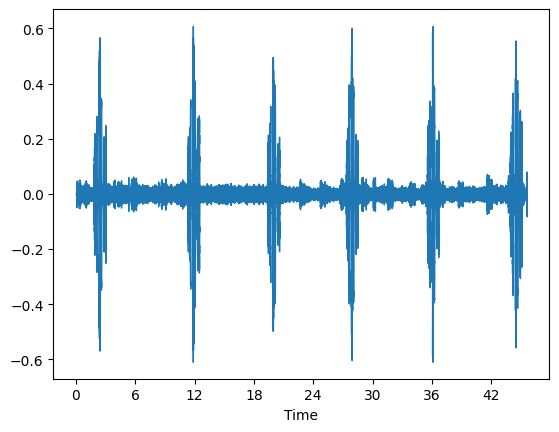

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [10]:
librosa.display.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(filename=filename, rate=sampling_rate)

In [11]:
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
mfccs_features

array([[-4.7565851e+02, -3.3129114e+02, -2.9382373e+02, ...,
        -2.9407053e+02, -2.6429852e+02, -3.1357742e+02],
       [ 6.4723587e+01,  4.8800148e+01,  3.0958853e+01, ...,
         3.9688614e+01,  7.8858261e+01,  9.4898376e+01],
       [ 3.0281847e+01,  2.2574059e+01,  1.0889378e+01, ...,
         1.2291723e+01,  2.5062336e+01,  2.6268227e+01],
       ...,
       [-7.5498266e+00, -3.3256621e+00,  2.7236233e+00, ...,
         6.4915981e+00,  6.1443067e+00,  4.8556280e+00],
       [ 2.4894755e+00,  2.3624086e+00,  9.7443938e-01, ...,
         1.6173246e+00,  4.4563565e-01, -3.5551482e-01],
       [ 9.5930648e-01,  1.6378360e+00,  2.7122717e+00, ...,
         6.4043455e+00,  4.4303932e+00,  4.5397778e+00]], dtype=float32)

In [12]:
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features

array([-3.02472870e+02,  3.65253758e+00, -1.61132183e+01,  3.63370442e+00,
       -1.73015320e+00, -8.63115406e+00,  4.71711349e+00,  1.28732948e+01,
        1.03681316e+01,  2.14360886e+01,  1.31963758e+01,  8.50434685e+00,
        6.35560846e+00,  8.79970932e+00,  3.15153027e+00,  1.20604925e+01,
        9.66134548e+00,  8.08003330e+00, -3.31969678e-01,  5.35988212e-01,
       -2.05300808e+00,  4.92492342e+00,  4.48030949e+00,  6.66860294e+00,
        2.44400215e+00,  7.90587187e+00,  2.83253479e+00,  4.69282818e+00,
       -3.99052978e-01,  1.36950517e+00, -1.40676424e-01,  3.94826508e+00,
       -1.53376079e+00,  2.47172046e+00,  1.26603103e+00,  4.43730927e+00,
        1.57033479e+00,  5.55401802e+00,  2.23351336e+00,  4.87867451e+00],
      dtype=float32)

In [13]:
y = df['primary_label']
X = mfccs_scaled_features

In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
extracted_features=[]
extracted_features_labels=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(DATASET_PATH, 'train_audio', row["filename"])
    final_class_labels=row["primary_label"]
    data=features_extractor(file_name)
    # extracted_features.append([data,final_class_labels])
    extracted_features.append(data)
    extracted_features_labels.append(final_class_labels)

6183it [22:14,  5.86it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_transformed = labelencoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.1, random_state=42)


In [ ]:
cls = MLPClassifier()
fitted_cls = cls.fit(X_train, y_train)